## Problem Metadata 
DO NOT DELETE (JSON Block; the metadata and course context MUST be in the first cell)

```json
{
    "problem_title": "vanDerWaalsPlot",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["hard"],
    "topic": "Properties",
    "lecture_reference": {
        "lecture_id": "1_blyiho9t",
        "subtopics": [
            {
              "key": "Fa25-L3b-6.0",
              "title": "van der Waals equation of state",
            }
        ]
    },
    "book_reference": {
        "chapter_number": 3,
        "title": "Properties of Pure Substances",
        "sections": [
            "Other Equations of State",
        ]
    },
    "notes": ""
}
```

## 1. Problem Statement
**Goal**: Plot the isotherms at the critical point of water using `pyCalor`, the van der Waals equation of state, and the ideal gas equation. 

## 2. Schematic
No schematic

## 3. Assumptions and Approximations
* **State Postulate** The state postulate allows a finite number of properties to be specified in order to fully describe a state of thermodynamic equilibrium.
* **Pure Substance** We only need two independent variables to determine the state.

## 4. Physical Laws and Governing Equations
The ideal gas equation for water can be written as:

$$ p = R T / v$$ 

where $R$ is the mass specific gas constant. 

The van der Waals equation is defined as:
$$\left(p + \frac{a}{v^2} \right) \left(v - b \right) = RT $$

where $p$ is pressure, $v$ is specific volume, $R$ is the specific gas constant, $T$ is temperature, and $a$ and $b$ are constants. We can write this as:

$$ p  = (R T_\text{cr} - (a/v^2) v + a b/v^2)/(v - b)$$

In [1]:
## 5. Properties (Code Cell)
!pip install pyCalor
from pyCalor import thermo as th
import numpy as np
import matplotlib.pyplot as plt

# critical point of water
Tc_K = 647.096 # K
pc_Pa = 22.060e6 # Pa

# triple point of water
Ttp_K = 273.16 # K
ptp_Pa = 611.6 # Pa

# critical state of water
stcritical = th.state('Water', p=pc_Pa/1e3, T=Tc_K, name="1")

Text(0, 0.5, '$p$ (MPa)')

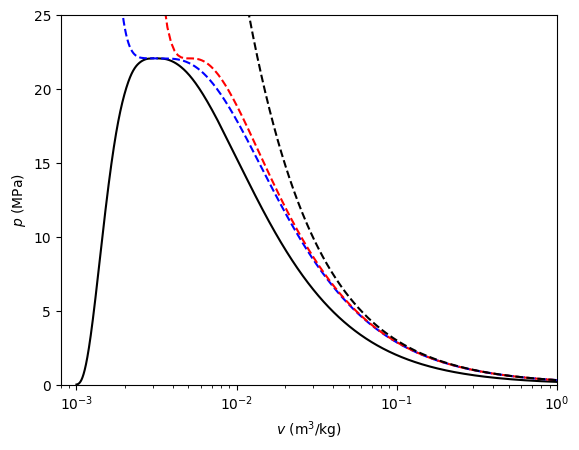

In [3]:
# 6. Calculations (Code Cell)
plt.figure()
plt.clf()

plt.xscale("log")
# plot the saturated liquid and saturated vapor lines
P = np.linspace(700/1e6, 22.063, 1000) # range of pressures
vvap = [s.v for s in [th.state('Water', x=1, p=p*1e3) for p in P]]
vliq = [s.v for s in [th.state('Water', x=0, p=p*1e3) for p in P]]
plt.plot(vvap, P, 'k-')
plt.plot(vliq, P, 'k-')

# plot the isotherm for the critical temperature using pyCalor
P_ = np.linspace(ptp_Pa/1e6, 30, 1000) # range of pressures, MPa
st = [th.state('Water', p=(p*1e3,'kPa'), T=(Tc_K,'K')) for p in P_]
v = [s.v for s in st]
plt.xscale("log")
plt.plot(v, P_, 'b--')

# plot the isotherm for the critical temperature using van der Waals
R_JperKgPerK = 461.5
a = (27 * (R_JperKgPerK**2) * (Tc_K**2))/(64 * pc_Pa)
b = (R_JperKgPerK* Tc_K)/(8 * pc_Pa)
v_ = np.linspace(0.35e-2, 1, 5000)
# van der Waals equation of state:
# p*v - p*b + (a/v**2)*v - a*b/v**2 = R*T
p_  = (R_JperKgPerK*Tc_K - (a/v_**2)*v_ + a*b/v_**2)/(v_ - b)
plt.plot(v_, p_/1e6, 'r--')

# plot the isotherm for the critical temperature using the ideal gas equation
p_IG = (R_JperKgPerK*Tc_K)/v_
plt.plot(v_, p_IG/1e6, 'k--')

# axes
ax = plt.gca()
xmin = 0.8e-3
xmax = 1
ax.set_xlim([xmin, xmax])
ymin = 0
ymax = 25
ax.set_ylim([ymin, ymax])
ax.set_xlabel('$v$ (m$^3$/kg)')
ax.set_ylabel('$p$ (MPa)')

# plt.savefig('pycalor-vdW-p-v-diagram.pdf')

## 7. Summary and Reasoning
We were able to plot critical temperature isotherms for water using `pyCalor`, the van der Waals equation of state, and the ideal gas equation. What we see is that for high values of specific volume, all three isotherms overlap, indicating that they are all valid. However, for lower specific volumes, below 0.1 m$^3$/kg the ideal gas equation significantly deviates from the other two isotherms, indicating that it is no longer valid.

THIS SHOULD BE THE FINAL CELL, DO NOT ADD OTHERS AFTER THIS, EVEN IF THEY'RE EMPTY
--- End of the Jupyter Notebook ---